In [240]:
import cv2
import matplotlib.pyplot as plt
from random import randrange
import numpy as np

# Bubbles

## Image preprocessing

loading the image and turning it into grayscale

(-0.5, 4287.5, 2847.5, -0.5)

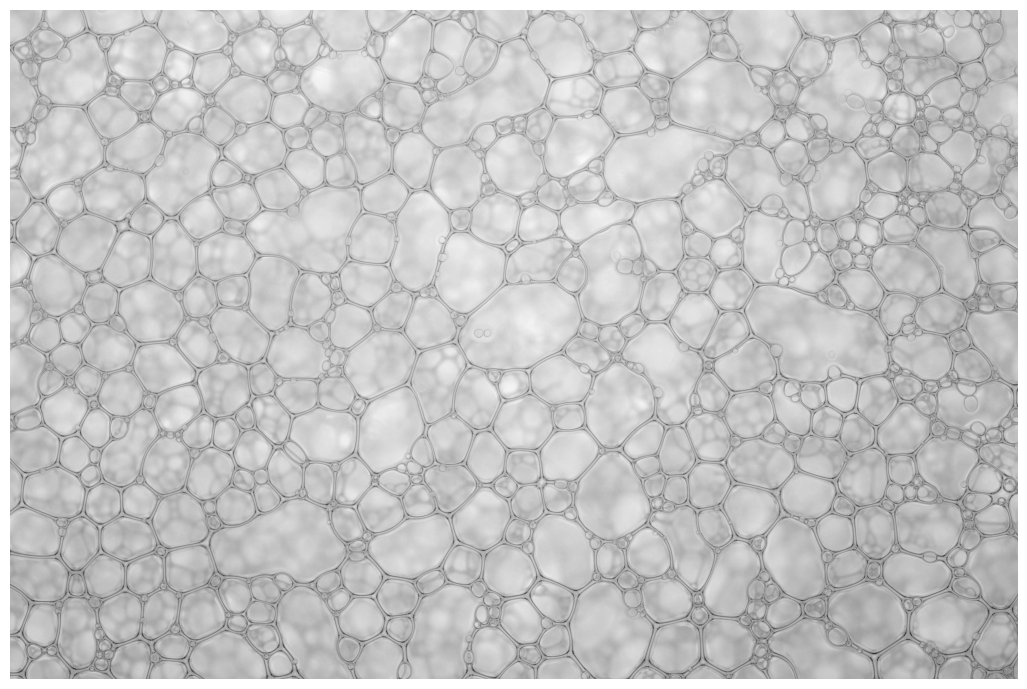

In [241]:
img = cv2.imread('data/pena.tif')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(13, 10))
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # display in rgb
plt.imshow(gray, cmap='gray')
plt.axis('off')

image filtering with gaussian blur

(-0.5, 4287.5, 2847.5, -0.5)

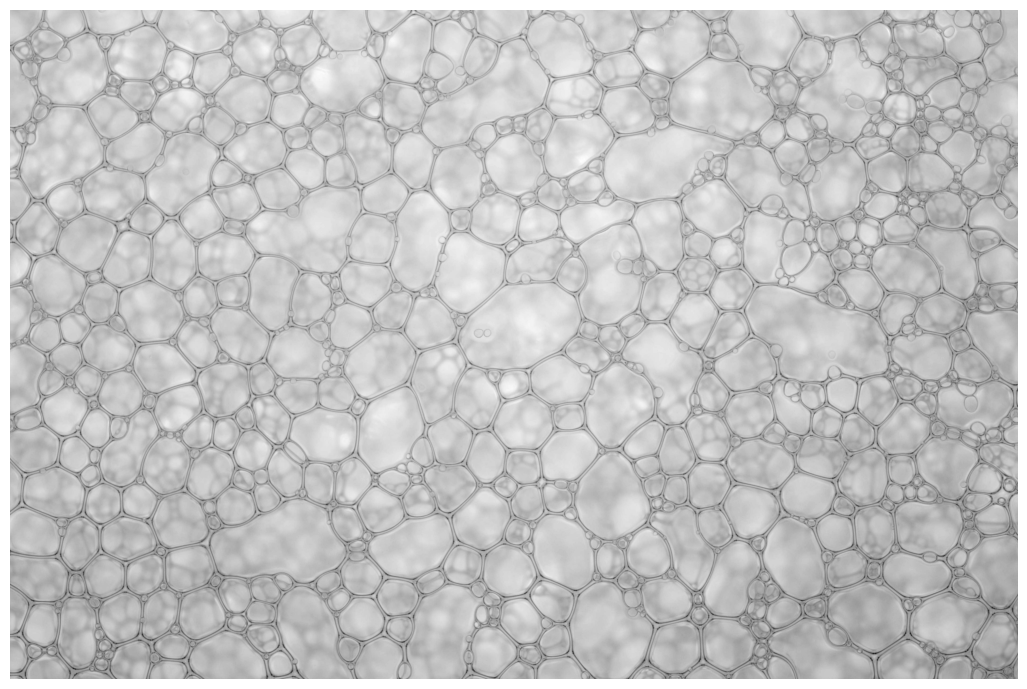

In [242]:
filtered = cv2.GaussianBlur(gray, (5, 5), 1)

plt.figure(figsize=(13, 10))
plt.imshow(filtered, cmap='gray')
plt.axis('off')

## Binarization using canny

(-0.5, 4287.5, 2847.5, -0.5)

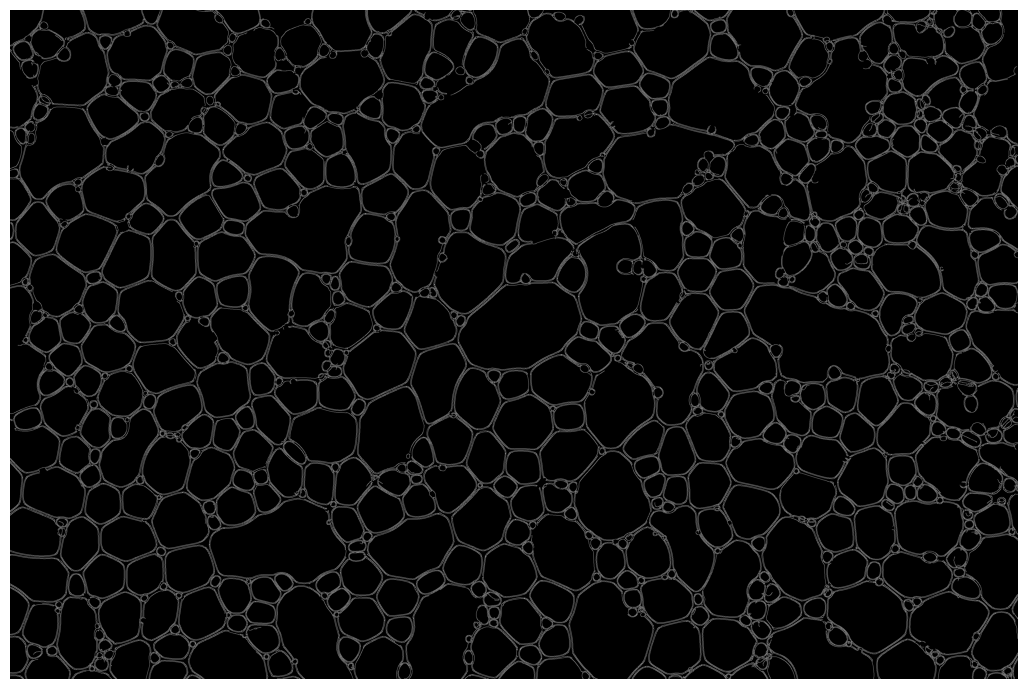

In [243]:
edges = cv2.Canny(filtered, 20, 120)

plt.figure(figsize=(13, 10))
plt.imshow(edges, cmap='gray')
plt.axis('off')

morphological diletation to highlight the edges

(-0.5, 4287.5, 2847.5, -0.5)

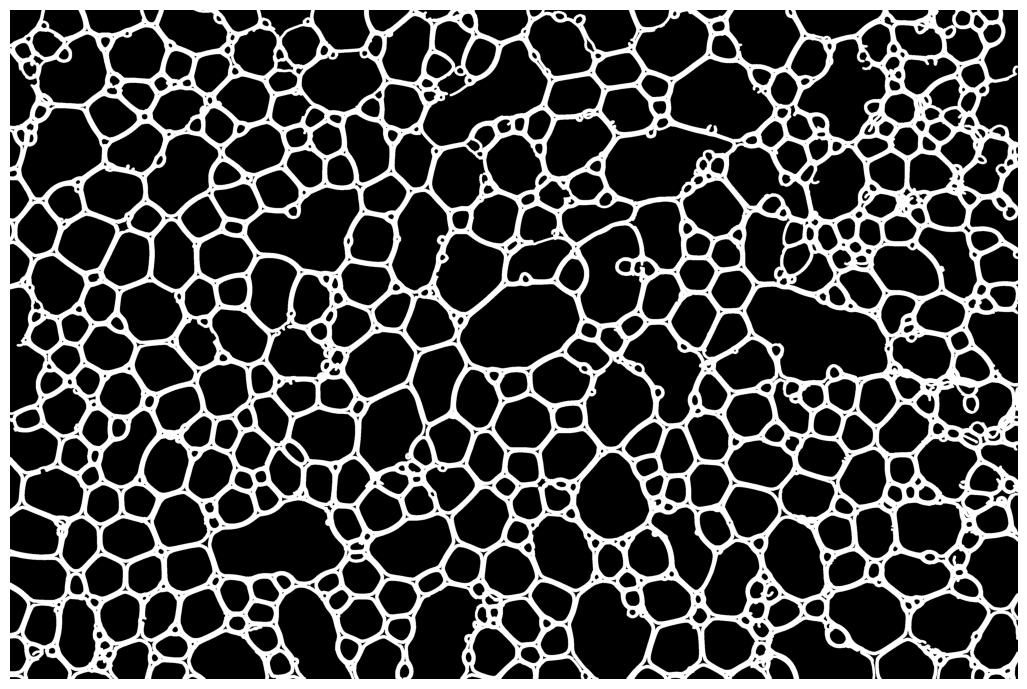

In [244]:
kernel = cv2.getStructuringElement(shape=cv2.MORPH_ELLIPSE, ksize=(11, 11))
edges = cv2.dilate(edges, kernel, iterations=1)

plt.figure(figsize=(13, 10))
plt.imshow(edges, cmap='gray')
plt.axis('off')

morphological closing to fill gaps between individual bubbles

(-0.5, 4287.5, 2847.5, -0.5)

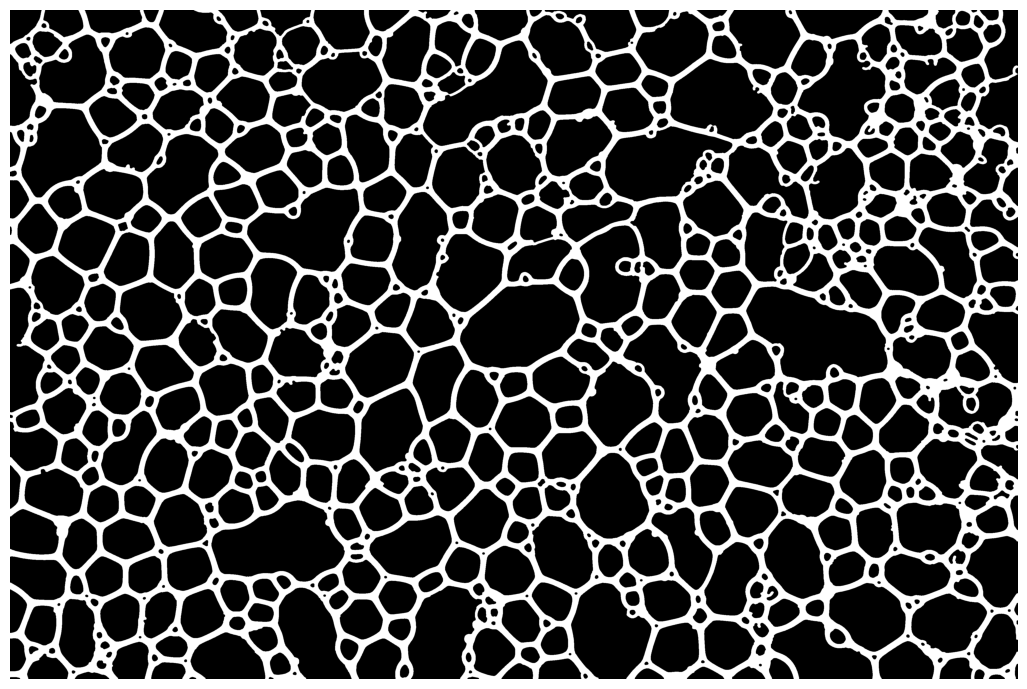

In [245]:
kernel = cv2.getStructuringElement(shape=cv2.MORPH_ELLIPSE, ksize=(11, 11))
edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel, iterations=1)

plt.figure(figsize=(13, 10))
plt.imshow(edges, cmap='gray')
plt.axis('off')

### Segmentation and Contour analysis

finding contours would not work well without inverting the created binary image first

(-0.5, 4287.5, 2847.5, -0.5)

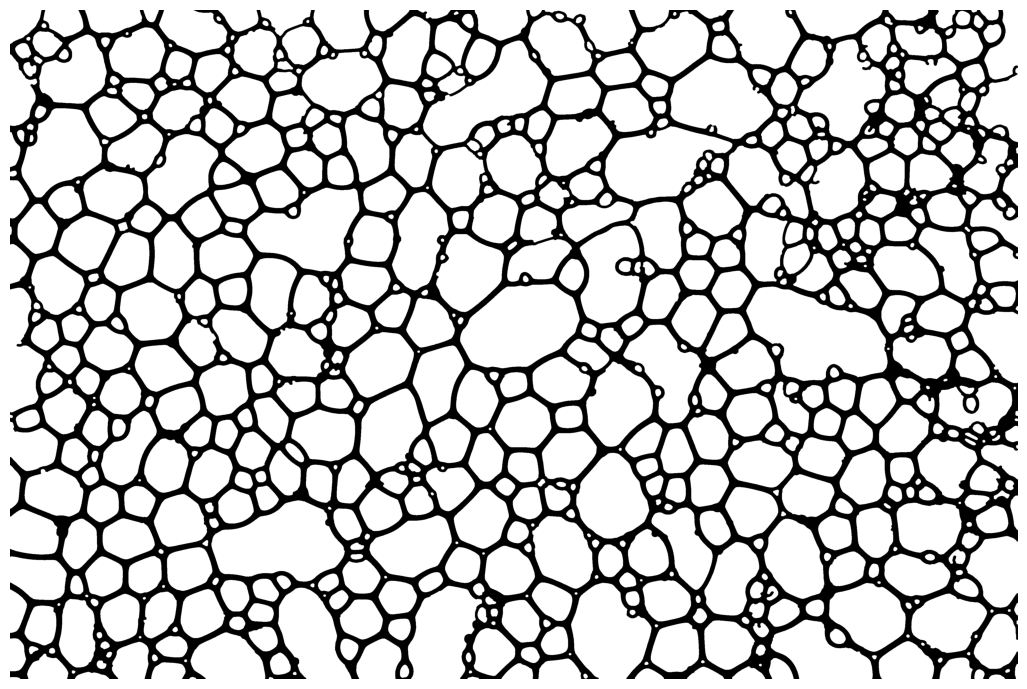

In [246]:
edges = cv2.bitwise_not(edges)

plt.figure(figsize=(13, 10))
plt.imshow(edges, cmap='gray')
plt.axis('off')

loop through the found contours, save their area and draw them on the original image


Canny
-----------------------
Number of bubbles:  735
Bubbles mean area: 12235.473
Bubbles max area:  155223.0


(-0.5, 4287.5, 2847.5, -0.5)

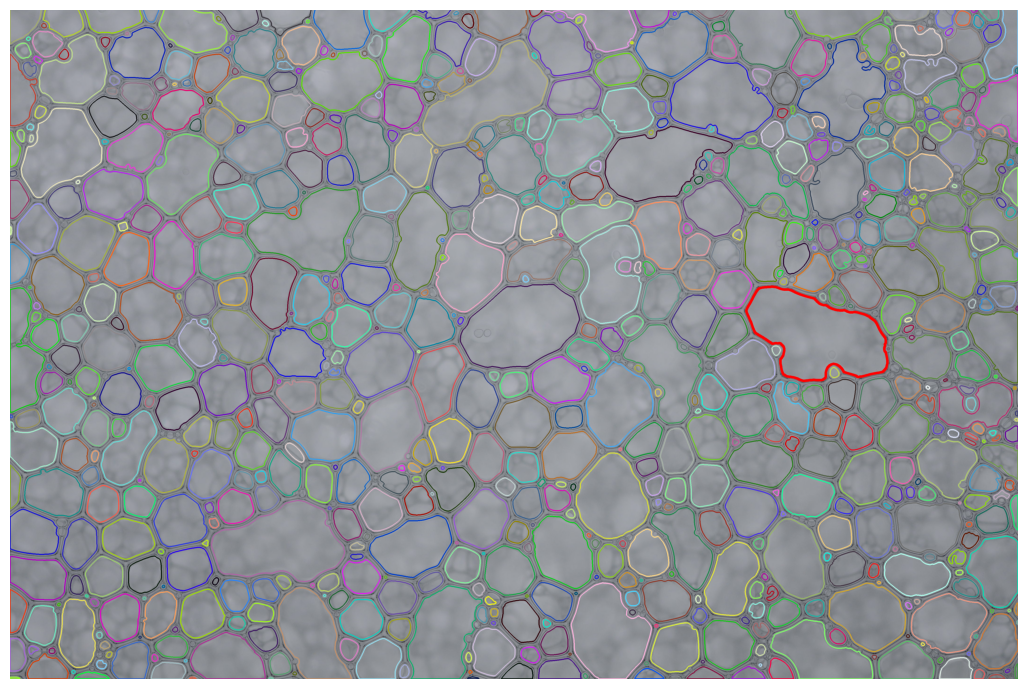

In [247]:
import copy
segmented_img = copy.deepcopy(img)

contours, h = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
n = 0

areas = []
biggest = { 'area': -1 }
for i, c in enumerate(contours):
    area = cv2.contourArea(c)
    # if area > 50:
    areas.append(area)

    if area > biggest['area']:
        biggest['area'] = area
        biggest['contour'] = i

    #colour = (255, 0, 0)
    colour = (randrange(255), randrange(255), randrange(255))
    cv2.drawContours(segmented_img, contours, i, colour, 3)
    n += 1

print('\nCanny')
print('-----------------------')
print('Number of bubbles: ', n)
print(f'Bubbles mean area: {np.mean(areas):.3f}')

cv2.drawContours(segmented_img, contours, biggest['contour'], (255, 0, 0), 10)
print('Bubbles max area: ', biggest['area'])

plt.figure(figsize=(13, 10))
plt.imshow(segmented_img)
plt.axis('off')

## Binarization using thresholding

(-0.5, 4287.5, 2847.5, -0.5)

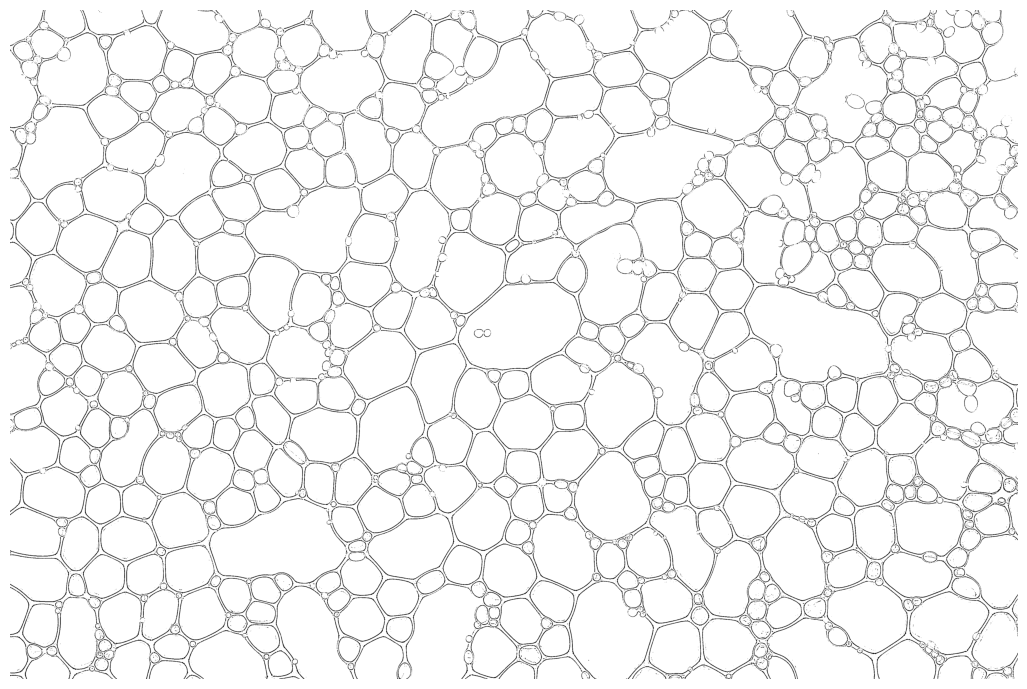

In [248]:
edges = cv2.adaptiveThreshold(filtered, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C , cv2.THRESH_BINARY, 5, 2)

plt.figure(figsize=(13, 10))
plt.imshow(edges, cmap='gray')
plt.axis('off')

(-0.5, 4287.5, 2847.5, -0.5)

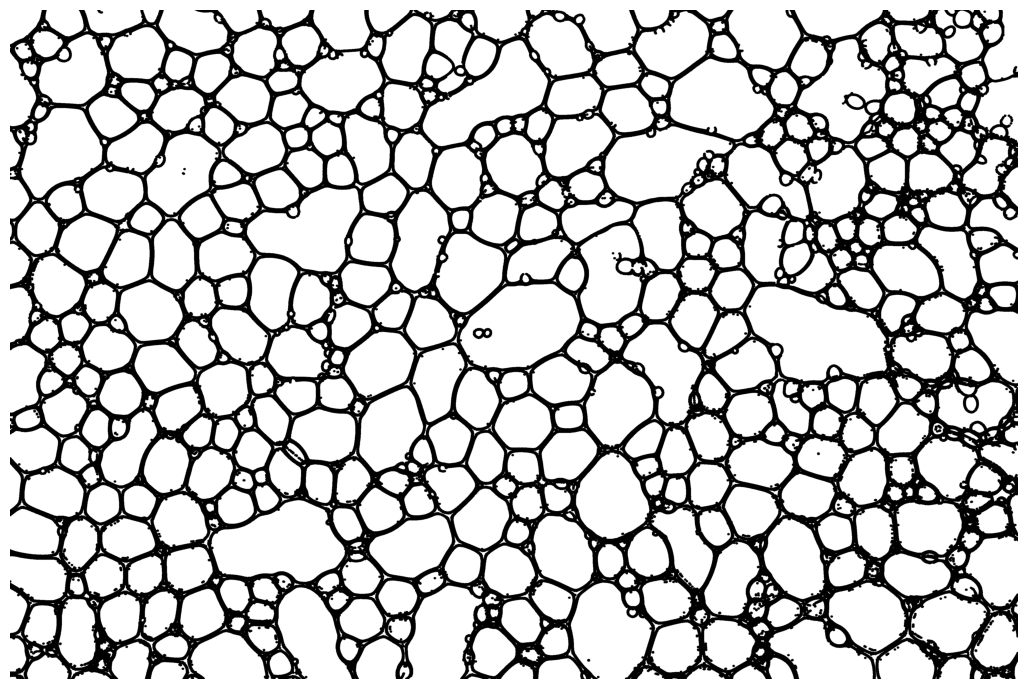

In [249]:
kernel = cv2.getStructuringElement(shape=cv2.MORPH_ELLIPSE, ksize=(11, 11))
edges = cv2.erode(edges, kernel, iterations=1)

plt.figure(figsize=(13, 10))
plt.imshow(edges, cmap='gray')
plt.axis('off')

(-0.5, 4287.5, 2847.5, -0.5)

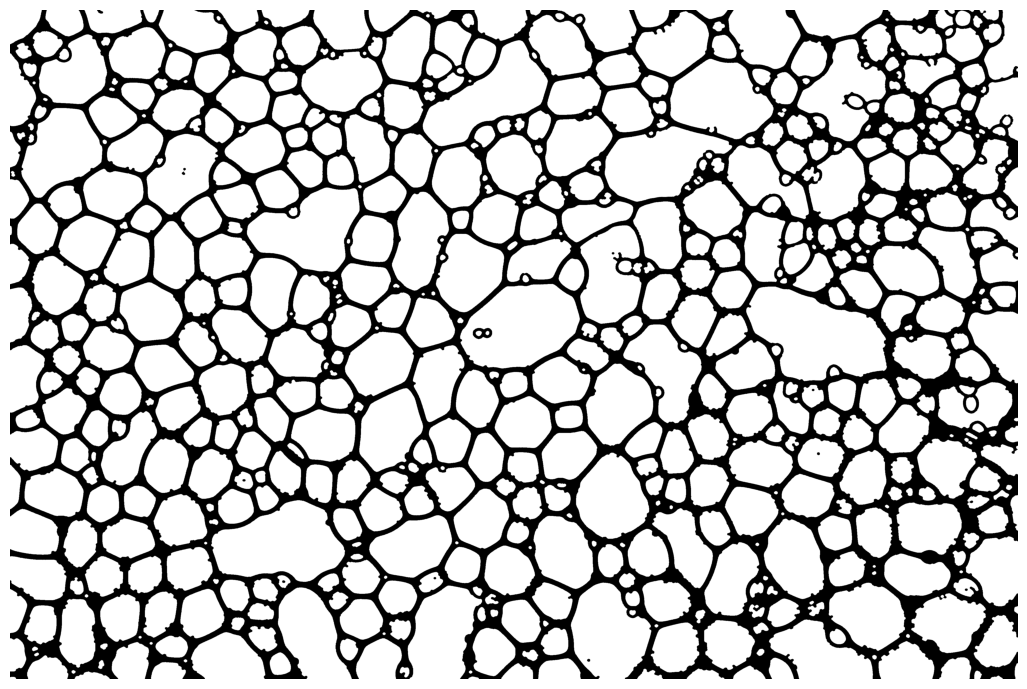

In [250]:
kernel = cv2.getStructuringElement(shape=cv2.MORPH_ELLIPSE, ksize=(7, 7))
edges = cv2.morphologyEx(edges, cv2.MORPH_OPEN, kernel, iterations=2)

plt.figure(figsize=(13, 10))
plt.imshow(edges, cmap='gray')
plt.axis('off')


Thresholding
-----------------------
Number of bubbles:  636
Bubbles mean area: 14054.748
Bubbles max area:  154924.5


(-0.5, 4287.5, 2847.5, -0.5)

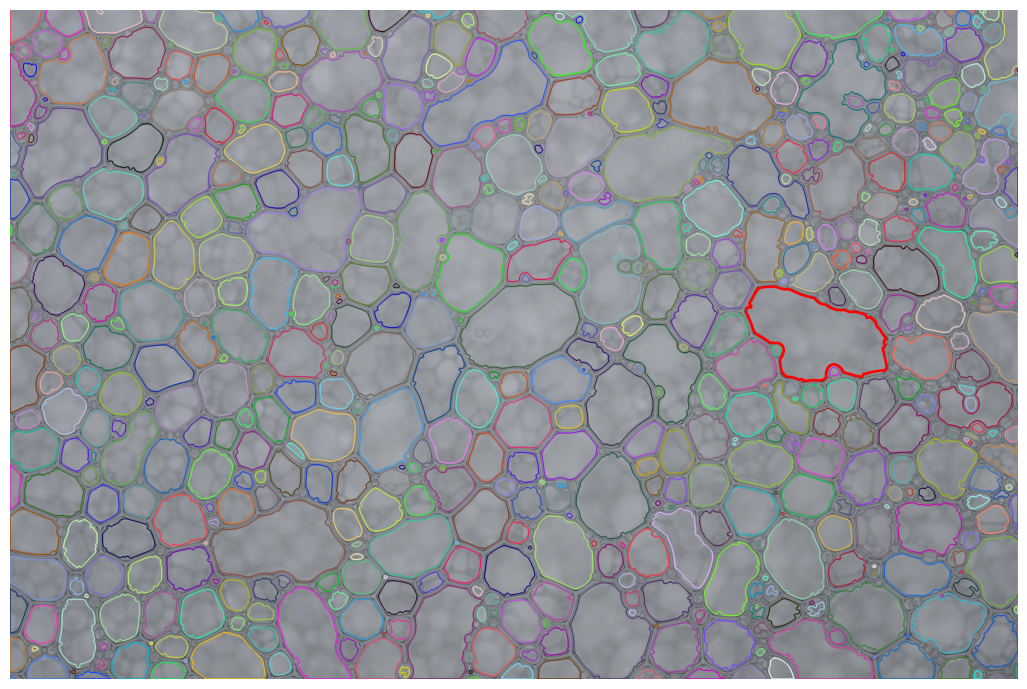

In [251]:
import copy
segmented_img = copy.deepcopy(img)

contours, h = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
n = 0

areas = []
biggest = { 'area': -1 }
for i, c in enumerate(contours):
    area = cv2.contourArea(c)
    # if area > 100:
    areas.append(area)

    if area > biggest['area']:
        biggest['area'] = area
        biggest['contour'] = i

    #colour = (255, 0, 0)
    colour = (randrange(255), randrange(255), randrange(255))
    cv2.drawContours(segmented_img, contours, i, colour, 3)
    n += 1

print('\nThresholding')
print('-----------------------')
print('Number of bubbles: ', n)
print(f'Bubbles mean area: {np.mean(areas):.3f}')

cv2.drawContours(segmented_img, contours, biggest['contour'], (255, 0, 0), 10)
print('Bubbles max area: ', biggest['area'])

plt.figure(figsize=(13, 10))
plt.imshow(segmented_img)
plt.axis('off')